# ASSIGNMENT 1 
## Introduction to Python for Data Science Kampus Merdeka


Nama : Tasya Fathia Putriansyah

PYTN-KS07-018

## Import Library yang diperlukan

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('ggplot')

## Import dan Exploring Dataset with Pandas

In [3]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')
print("Data read into a pandas dataframe!")

Data read into a pandas dataframe!


In [4]:
# View the top 5 rows of the dataset
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
# View the bottom 5 rows of the dataset
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


When analyzing a dataset, it's a good idea to start by getting basic information about dataframe.

In [6]:
# To get basic information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
# To get the list of columns headers
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [8]:
# To get index values
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [9]:
# To view the dimension of the dataframe
df.shape

(13490604, 7)

In [10]:
# To view summary of each column in the dataframe
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [11]:
# Check missing value in dataset
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Karena semua missing value dari setiap kolom berjumlah 0 maka tidak terdapat missing value pada dataset

In [12]:
# To view number of unique from each columns
df.nunique()

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

In [13]:
# Check Duplication of data
dups = df.duplicated()
print(dups.any())

False


Setelah mengecek duplikasi data didapatkan hasil yang menyatakan 'False' sehingga tidak terdapat duplikasi pada dataset.

In [14]:
df2 = df[['borough', 'value']]
df2.head()

,borough,value
0,Croydon,0
1,Greenwich,0
2,Bromley,0
3,Redbridge,0
4,Wandsworth,0


## Line Plot (Series/Dataframe)

**Question:** Plot a line graph of Crimes of Redbridge from 2010-2016

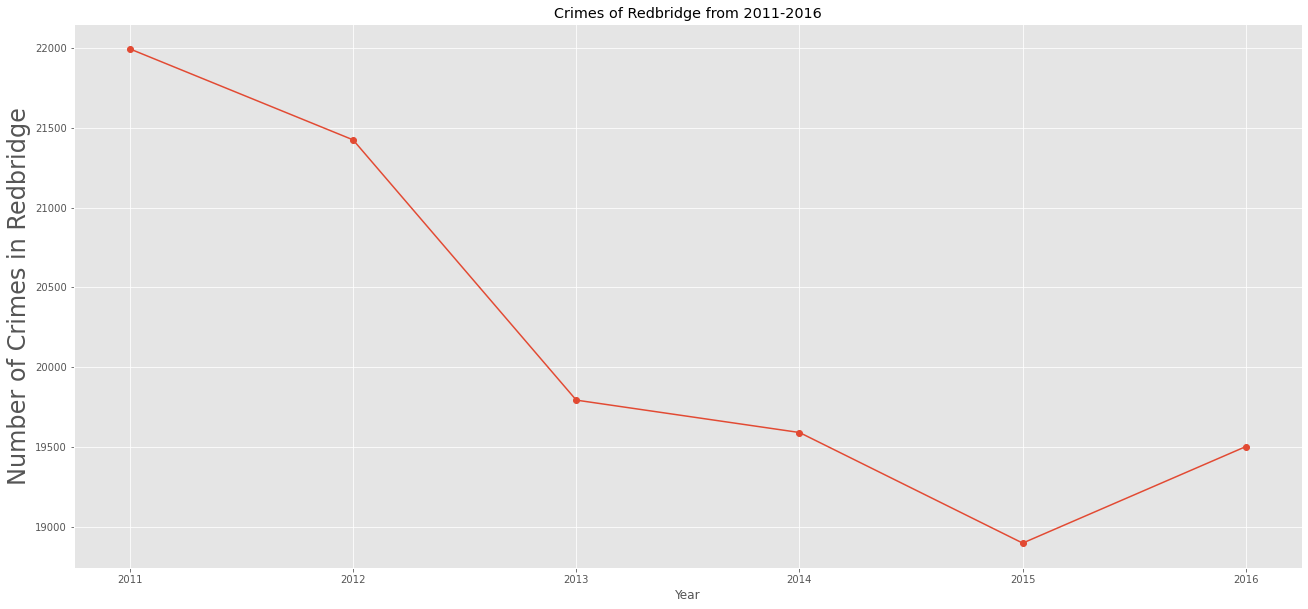

In [15]:
Redbridge = df[(df["borough"] == "Redbridge") & (df["year"]>2010)].groupby(["year"])["value"].sum()
Redbridge.plot(kind='line', marker='o', figsize=(22, 10))

plt.title('Crimes of Redbridge from 2011-2016')
plt.ylabel('Number of Crimes in Redbridge', fontsize=24)
plt.xlabel('Year')

plt.show()

In [16]:
Redbridge = df[(df["borough"] == "Redbridge") & (df["year"]>2010)].groupby(["year"])["value"].sum()
Redbridge

year
2011    21994
2012    21424
2013    19793
2014    19590
2015    18897
2016    19502
Name: value, dtype: int64

**Insight :** Dapat dilihat pada grafik bahwa dari tahun 2011 hingga tahun 2015 mengalami penurunan jumlah kasus yang terjadi di Redbrige namun pada tahun 2016 mengalami kenaikan kembali namun tidak terlalu signifikan.

## Area Plots

In [17]:
df1 = df[['borough', 'value']].groupby('borough')['value'].sum()
df1.head()

borough
Barking and Dagenham    149447
Barnet                  212191
Bexley                  114136
Brent                   227551
Bromley                 184349
Name: value, dtype: int64

In [18]:
df_top = df1.sort_values(ascending=False).head()
df_top

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Name: value, dtype: int64

In [19]:
df_westminster = df[(df['borough'] == 'Westminster')].groupby(['year'])['value'].sum()
df_westminster = df_westminster.to_frame()
df_westminster = df_westminster.rename(columns = {'value':'Westminster'})

In [20]:
df_lambeth = df[(df['borough'] == 'Lambeth')].groupby(['year'])['value'].sum()
df_lambeth = df_lambeth.to_frame()
df_lambeth = df_lambeth.rename(columns = {'value':'Lambeth'})

In [21]:
df_southwark = df[(df['borough'] == 'Southwark')].groupby(['year'])['value'].sum()
df_southwark = df_southwark.to_frame()
df_southwark = df_southwark.rename(columns = {'value':'Southwark'})

In [22]:
df_camden = df[(df['borough'] == 'Camden')].groupby(['year'])['value'].sum()
df_camden = df_camden.to_frame()
df_camden = df_camden.rename(columns = {'value':'Camden'})

In [23]:
df_newham = df[(df['borough'] == 'Newham')].groupby(['year'])['value'].sum()
df_newham = df_newham.to_frame()
df_newham = df_newham.rename(columns = {'value':'Newham'})

In [24]:
df_areatop5 = pd.concat([df_westminster, df_lambeth, df_southwark, df_camden, df_newham], axis=1, sort=False)
df_areatop5

,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


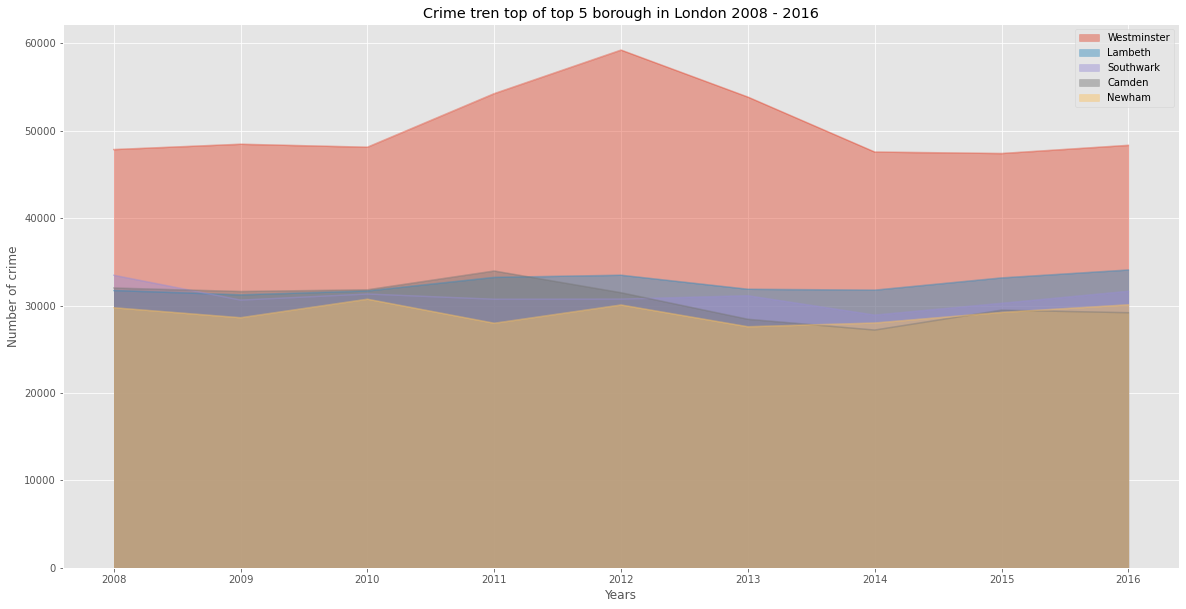

In [25]:
# Kolom tahun sebagai tabel
label_area = df['year'].unique()

# Area Plots
df_areatop5.index = df_areatop5.index.map(int)
df_areatop5.plot(kind='area', 
                 alpha = 0.45,
                 label = label_area, 
                 stacked=False, 
                 figsize=(20, 10))

plt.title('Crime tren top of top 5 borough in London 2008 - 2016')
plt.ylabel('Number of crime')
plt.xlabel('Years')

plt.show()

**Insight :** Crime tren top 5 borough in London ada pada saat, 
1. Westminster tahun 2012
2. Lambeth tahun 2016
3. Southwark tahun 2008
4. Camden tahun 2011
5. Newham tahun 2010

## Histogram

**Question :**
What is major category that the most happen in London?

In [26]:
df['major_category'].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

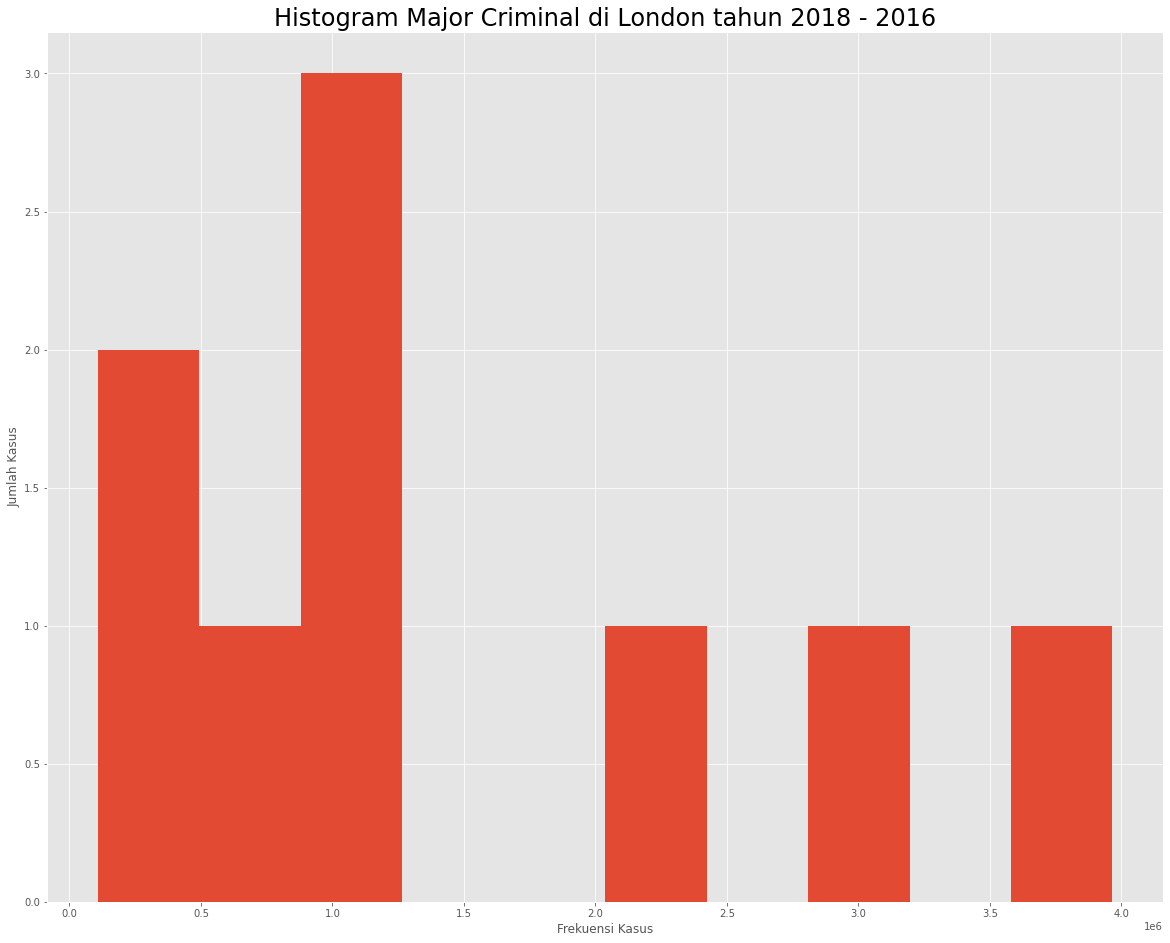

In [27]:
df['major_category'].value_counts().plot(kind='hist', figsize=(20,16))

plt.title('Histogram Major Criminal di London tahun 2018 - 2016', fontsize=24)
plt.ylabel('Jumlah Kasus')
plt.xlabel('Frekuensi Kasus')

plt.show()

**Insight :** histogram menunjukkan bahwa dari keseluruhan kasus terbanyak yang terjadi di London pada tahun 2008 - 2016 terlihat bahwa terdapat 3 kasus yang menunjukkan frekuensi tersering.

## Bar Chart (Dataframe)

In [28]:
Croydon = df[(df['borough'] == 'Croydon') & (df['year'] == 2016)].groupby(['major_category'])['value'].sum()
Croydon

major_category
Burglary                        2738
Criminal Damage                 3219
Drugs                           1367
Fraud or Forgery                   0
Other Notifiable Offences        718
Robbery                         1139
Sexual Offences                    0
Theft and Handling              9229
Violence Against the Person    10302
Name: value, dtype: int64

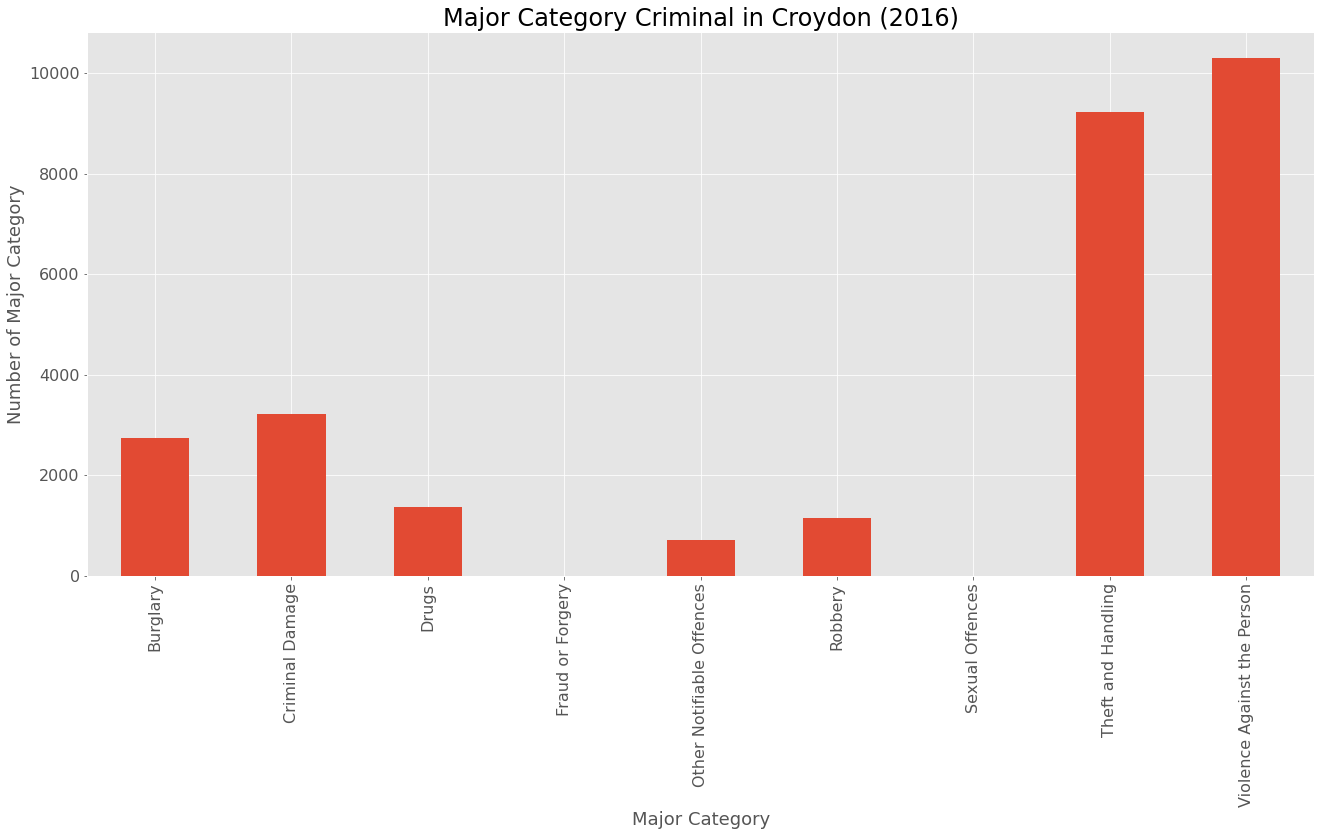

In [29]:

Croydon = df[(df['borough'] == 'Croydon') & (df['year'] == 2016)].groupby(['major_category'])['value'].sum()

Croydon.plot(kind='bar', figsize=(22, 10), fontsize=16)

plt.title('Major Category Criminal in Croydon (2016)', fontsize=24)
plt.ylabel('Number of Major Category', fontsize=18)
plt.xlabel('Major Category', fontsize=18)

plt.show()

**Insight :** Pada grafik menunjukkan jumlah major kasus kriminal yang terjadi di Croydon pada tahun 2016 di mana dapat dilihat bahwa kasus tertinggi pada tahun 2016 adalah Violence Against the Person.

## Pie Charts

In [30]:
df2 = df[['borough', 'value']]

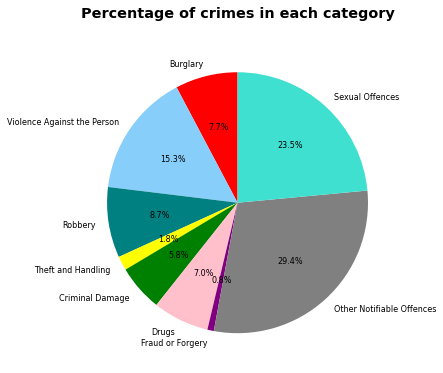

In [31]:
font1 = {'color':'black', 
        'weight':'bold' 
        }

lables = df['major_category'].unique()

sizes = df.groupby(['major_category']).size()
colors=['red','lightskyblue','teal','yellow', 'green','pink','purple','grey','turquoise']
plt.figure(figsize=(15, 6))
ax = plt.axes()
ax.set_facecolor('lightblue')
plt.title('Percentage of crimes in each category\n', fontdict=font1)

ab = plt.pie(sizes, labels=lables, colors=colors, startangle=90, autopct='%1.1f%%', textprops={'fontsize':8})

plt.show()

**Insight :** Urutan persentase kejahatan di setiap kategori dari yang terbesar :
1. Other Notifiable Offences 29.4%
2. Sexual Offences 23.5%
3. Violence Against the Person 15.3%
4. Robbery 8.7%
5. Buglary 7.7%
6. Drugs 7.0%
7. Criminal Damage 5.8%
8. Theft and Handling 1.8%
9. Fraud or Forgery 0.8%

## Box Plot

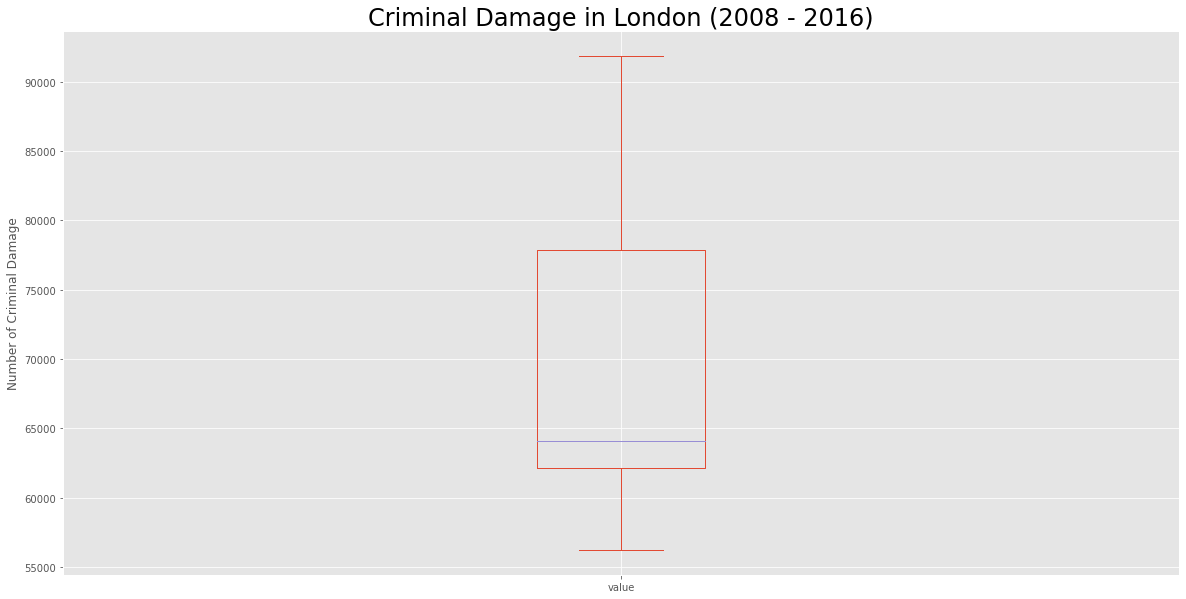

In [32]:
df_box = df[(df['major_category']=='Criminal Damage')].groupby(['year'])['value'].sum()
df_box.plot(kind='box', figsize=(20, 10))

plt.title('Criminal Damage in London (2008 - 2016)', fontsize = 24)
plt.ylabel('Number of Criminal Damage')

plt.show()

**Insight :** Value (Nilai) kasus Criminal Damage yang terjadi di London pada tahun 2008 - 2016

## Scatter Plot

**Question :** Bagaimana jumlah kasus Harrassment di Hackney pada tahun 2008 sampai 2016?

In [33]:
X = pd.DataFrame (df [(df["borough"] == "Hackney") & (df["minor_category"]=="Harassment")].groupby(["year"])["value"].sum())
X.index = map (int, X.index)
X.reset_index(inplace = True)
X.columns = ['Tahun', 'Jumlah Kasus']
X.head()

,Tahun,Jumlah Kasus
0,2008,1444
1,2009,1438
2,2010,1399
3,2011,1172
4,2012,1586


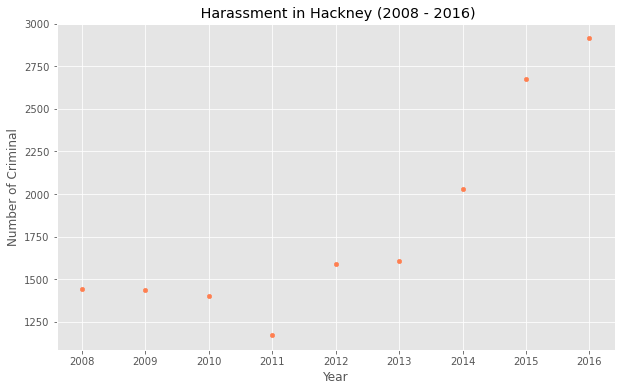

In [34]:
# Write your function below
HH = pd.DataFrame (df [(df["borough"] == "Hackney") & (df["minor_category"]=="Harassment")].groupby(["year"])["value"].sum())
HH.index = map (int, HH.index)
HH.reset_index(inplace = True)
HH.columns = ['Year', 'Number of Criminal']
# Graded-Funtion Begin (~1 Lines)
HH.plot(kind='scatter', x='Year', y='Number of Criminal', figsize=(10, 6), color='coral')
# Graded-Funtion End

plt.title(' Harassment in Hackney (2008 - 2016)')
plt.xlabel('Year')
plt.ylabel('Number of Criminal')

plt.show()

**Insight :** Dari scatter plot diatas dapat dilihat bahwa pada tahun 2016 kasus Harrassment mencapai titik tertinggi selama 8 tahun terakhir. Kenaikan ini terjadi dari tahun 2012 di mana grafik selalu mengalami kenaikan hingga tahun 2016.

**Question :** Bagaimana jumlah angka kriminal yang terjadi pada tahun 2016 di setiap bulannya?

In [35]:
df_2016=df.loc[df['year'] == 2016]

months = df_2016['month'].unique()
months.sort()

sum_month = df_2016.groupby(['month']).sum()

In [36]:
Values = sum_month['value'].to_numpy()
name_of_months = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print('Number of Crime in Each Month in the Year 2016')
print(name_of_months)
print(Values)

Number of Crime in Each Month in the Year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[58847 56697 59167 58637 63990 62262 65519 62666 61412 63405 61064 62455]


In [37]:
month1 = np.arange(len(months))
xrange = range(1, 13)

**Question :** Buatlah Scatter Plots angka kriminalitas di London pada tahun 2016 di setiap bulannya?

([<matplotlib.axis.XTick at 0x1d50d9c0400>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'Mei'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

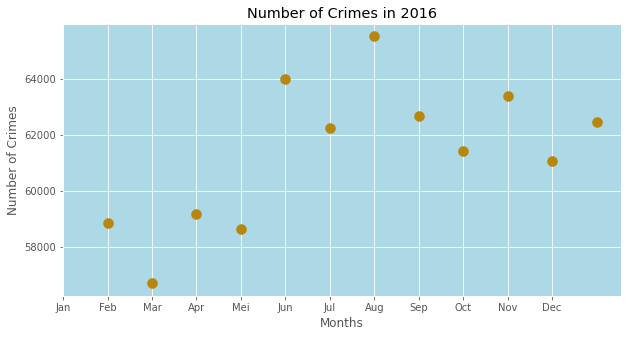

In [38]:
plt.figure(figsize=(10, 5))

ax = plt.axes()
ax.set_facecolor('lightblue')

plt.scatter(xrange, Values, s=100, color='darkgoldenrod', cmap='viridis', alpha=1)
plt.title('Number of Crimes in 2016')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

plt.xticks(month1, name_of_months)

**Insight :** Pada Scatter Plot diatas dapat diambil suatu informasi yaitu angka kriminalitas tertinggi di London pada tahun 2016 terdapat pada bulan Agustus.

## Word Cloud

In [39]:
from wordcloud import WordCloud, STOPWORDS

In [40]:
df.minor_category = df['minor_category']
df.minor_category.head()

0    Burglary in Other Buildings
1                 Other violence
2                 Other violence
3    Burglary in Other Buildings
4              Personal Property
Name: minor_category, dtype: object

In [41]:
word_string = " ".join(str(i) for i in df.minor_category)

word_cloud = WordCloud(max_words=90, background_color='white').generate(word_string)
print(word_cloud)

In [42]:
df.minor_category.unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

In [43]:
df.minor_category.nunique()

32

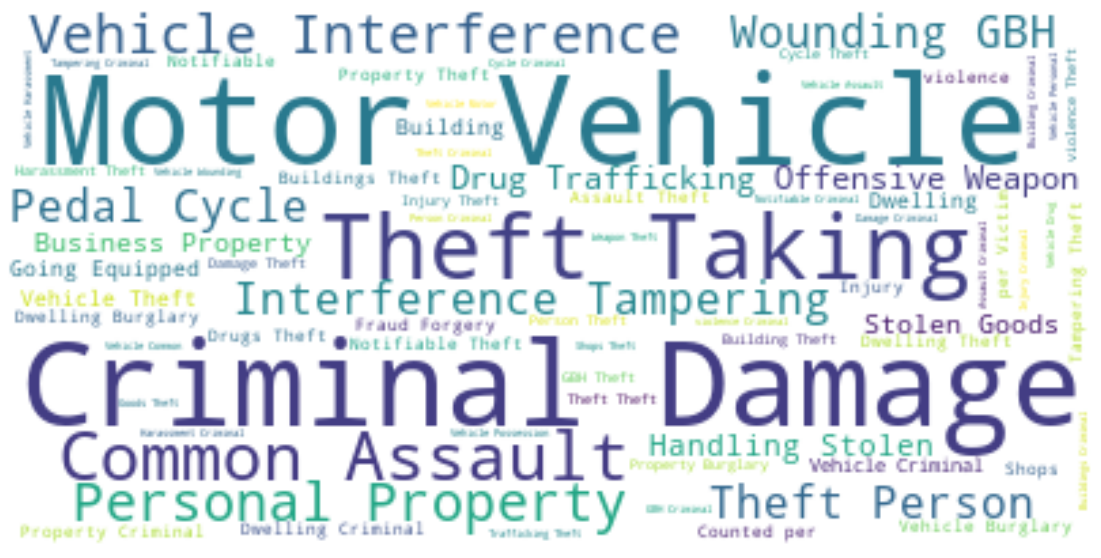

In [44]:
plt.figure(figsize = (20, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Insight :** Dari wordcloud diatas dapat dilihat bahwa tulisan terbesar adalah Criminal Damage dan Motor Vehicle di mana artinya adalah di Minor Category yang memiliki jumlah terbanyak adalah kategori tersebut.

## Folium Map

In [45]:
import folium

In [46]:
# Define the world map
world_map = folium.Map()

# display world map
world_map

In [47]:
latitude = 51.5072
longitude = 0.1276

In [48]:
# Define the world map centered around London with a Low zoom level 8
London_map = folium.Map(location=[latitude, longitude], 
                        zoom_start = 8)
London_map

In [49]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [50]:
borough_coor = pd.DataFrame({
    "X" : [0.0982, 0.0098, 0.0132, 0.0824, 0.1897], 
    "Y" : [51.3762, 51.4934, 51.4060, 51.5886, 51.4568]}, 
    index = ['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth'])

borough_coor.head()

,X,Y
Croydon,0.0982,51.3762
Greenwich,0.0098,51.4934
Bromley,0.0132,51.4060
Redbridge,0.0824,51.5886
Wandsworth,0.1897,51.4568


In [51]:
crime = folium.map.FeatureGroup()
for lat, lng, in zip(borough_coor.Y, borough_coor.X):
    crime.add_child(folium.CircleMarker([lat, lng], 
                                        radius = 5, 
                                        color = 'yellow', 
                                        fill = True, 
                                        fill_color = 'red', 
                                        fill_opacity = 2))
London_map.add_child(crime)